(sec-digitization-errors)=
# Digitization Errors

## The origin of digitization error

True real numbers are continuous.Between any two real numbers there are uncountably many of other real numbers.  On the other hand, floating point numbers is expressed in 64 bits of a binary string and thus there are only finite numbers of them.  Real numbers expressed in the floating point format are descrete.  Figure {numref}`fig-floating-point-line` illustrates the descreteness of floating point numbers.  As you can see there is a gap between two nearest numbers.  No values between them are possible.  If you enter a number inside the gap, computers won't understand it and the nearest floating point number is assigned.  Almost all real numbers fall into a gap.  Hence, floating point calculation never be exact. The error is known as [digitization error](https://en.wikipedia.org/wiki/Discretization_error) and it is unfortunately unavoidable.  In some cases, errors dominate and the result of calculation can be completely garbage.  We need to understand the extent of digitization errors and mitigating them by good algorithms is essential to computational physics. Every gap can be a sourc of computational error (often called as *neumerical error*.)  In particular the gap between 0 and the smallest positive floating point numer causes significant trouble known as underflow error.  Similarly we draw attention to the gap between 1 and the next flowting point value $1+\epsilon$ where $\epsilon$ is called *machine epsilon*.  See the diagram  {numref}`fig-floating-point-line`.


```{figure} floating-point-line.png
---
name: fig-floating-point-line
---
Discreteness of floating point numbers.
```


## Underflow errors

The smallest positive floating number in double precision is fmin=$2.2250738585072014E-308$. (See Sec. {numref}`sec-floating-point`.)  The next floating number below fmin is $0$. If the result of computation happens to be btween 0 and fmin, *underflow* occurs and it is replaced with 0.  fmin is very small and thus 0 is practically a good approxaimation.  So, this error seems not significant and computation will not be terminated at this point.  However, as computation continues disaster may happen at a later time.  

---

**Example 1.5.1**:  Bohr radius 

Let us evaluate the Bohr radius (the radius of a hydrogen atom) in SI units.
    
The Bohr radius is given by $a_0 = \displaystyle\frac{4 \pi \epsilon_0 \hbar^2}{m e^2}$ where

* $\epsilon_0 = 8.854187817 \times 10^{-12} F/m$
* $\hbar = 6.62606957 \times 10^{-34}/2\pi, m^2\, kg / s $
* $m = 9.10938291 \times 10^{-31}\, kg$
* $e = 1.602176565 \times 10^{-19} C$

The parameter values are small in SI units.  In order to demonstrate the danger of underflow error, we first try to calculate it using sngle precision (float32 in numpy).

In [1]:
# Python issues runtim warning message when the number is too large.
# The warning is often annoying.  Therefore, we hide the warniong message
import warnings
warnings.filterwarnings('ignore')

# Using single precision throuout the calculation

import numpy as np

# Set the parameter values
pi=np.float32(np.pi)
epsilon=np.float32(8.854187817e-12)
hbar=np.float32(6.62606957e-34/(2*pi))
mass=np.float32(9.10938291e-31)
e=np.float32(1.602176565e-19)

# Evaluate the denominator and numerator separately.
denominator=np.float32(mass*e**2)
numerator=np.float32(4.*pi*epsilon*hbar**2)
print("denorminator =",denominator)
print("numeratr =", numerator)
print("Bohr radius=",numerator/denominator)

denorminator = 0.0
numeratr = 0.0
Bohr radius= nan


Both denominator and neumerator are too small and replaced by 0.  This underflow error seems innocent and computation continues.  But the next operation is now 0/0 which causes nan.  Python issues runtime warning message.  If double precision were used, no underflow took place and the correct value would be obtained.  Here we try to mitigate the underflow error by changing the order of computation.
Rewriting the formula as $a = \displaystyle\left(\frac{4\pi \epsilon_0}{m}\right) \left(\frac{\hbar}{e}\right)^2$ and evaluate inside each parenthesis separately. No underflow occurs in this way even with single precision.  In the follwing code, $x=\displaystyle\left(\frac{4\pi \epsilon_0}{m}\right)$ and $y= \displaystyle\left(\frac{\hbar}{e}\right)$.

In [2]:
x=np.float32(4.*pi*(epsilon/mass))
y=np.float32(hbar/e)
print("x =",x)
print("y =",y)
print("a =", x*y*y)

x = 1.2214331e+20
y = 6.582119e-16
a = 5.2917722e-11


We find that Bohr radius is $5.2917722 \times 10^{-11}$ m.  Now we need to check if all the figures are significant.  The significant figure of the parameter values is 10.  However, the significant figure of single precision is about 7. Hence, the siginificant figure of the outcome is 7 at best.  We can safely say that $a_0 = 5.291772\times 10^{-11}$ m. (Notice that the last digit "2" is ignored.)

*Exercise:*  Evaluate the Bohr radius up to 10 siginificant figure using double precision.

## Machine epsilon

The gap between $1$ and the next floating point number above 1 is called *[machine epsilon](https://en.wikipedia.org/wiki/Machine_epsilon)* $\epsilon$.  See Fig. {numref}`fig-floating-point-line`.  There is no floating point number  between $1$ and $1+\epsilon$. Any number between them is rounded down to 1.  For eample, $1+\frac{\epsilon}{2} \Rightarrow 1$.
This can cause catastrophic errors in some applications. It is so important that numpy provide the value of $\epsilon$.  In the following example, you can find the machine epsilon of your computer.


In [3]:
import numpy  as np

# get machine epsilon in double precision from numpy
e=np.finfo(float).eps

print("epsilon =",e)
print("1+epsilon =",1.0+e)
print("1+epsilon/2 =",1.0+e/2.0)

epsilon = 2.220446049250313e-16
1+epsilon = 1.0000000000000002
1+epsilon/2 = 1.0


Notice that $1+\epsilon$ shows $2$ at the last figure.  Only the first figure of the machine epsilon appeared and there is no room for the remaining part of $\epsilon$.  Notice that $1+\epsilon/2$ outputs exactly 1.0. Adding $\epsilon/2$ does nothing. 

*Exercise* Compute $1 + \epsilon/2 + \epsilon/2$.  The answer is not $1+\epsilon$.  You will get 1.0.  Why?

---

**Example 1.5.2**:  7/3-4/3-1 = ?

Consider simple calculations $a=\displaystyle\frac{5}{3}-\frac{2}{3}-1$ and $b=\displaystyle\frac{7}{3}-\frac{4}{3}-1$.  You can easily find that both are exactly zero.  However, computers don't think so.  The former vanishes as expected but the latter equals to the machine epsilon.

In [4]:
a=5/3-2/3-1
b=7/3-4/3-1
print("a=",a,"   b=",b)

a= 0.0    b= 2.220446049250313e-16


The former vanishes as expected but the latter equals to the machine epsilon.


---

**Example 1.5.3**
    
Suppose that we want to evalue $y=\displaystyle\frac{(x+1)^2-1}{x}$ for small $x$.  Somehow we are not smart and evaluate it directly. A smart person would simplify the expression and find $y=x+2$.  Since these two expresions are mathematically equivalent, both should produce the same result, shouldn't it? Let us try with $x=1, 1/10, \cdots, 1/10^{17}$.

In [5]:
import numpy as np

i=np.arange(18)
x = 1.0/10**(i)
y = ((x+1)**2-1)/x
z = x+2
for i in range(18):
    print("x={0:8.1e}, y={1:15.12f}, x+2={2:15.12f}".format(x[i],y[i],z[i]))


x= 1.0e+00, y= 3.000000000000, x+2= 3.000000000000
x= 1.0e-01, y= 2.100000000000, x+2= 2.100000000000
x= 1.0e-02, y= 2.010000000000, x+2= 2.010000000000
x= 1.0e-03, y= 2.001000000000, x+2= 2.001000000000
x= 1.0e-04, y= 2.000099999999, x+2= 2.000100000000
x= 1.0e-05, y= 2.000010000014, x+2= 2.000010000000
x= 1.0e-06, y= 2.000000999924, x+2= 2.000001000000
x= 1.0e-07, y= 2.000000101088, x+2= 2.000000100000
x= 1.0e-08, y= 1.999999987845, x+2= 2.000000010000
x= 1.0e-09, y= 2.000000165481, x+2= 2.000000001000
x= 1.0e-10, y= 2.000000165481, x+2= 2.000000000100
x= 1.0e-11, y= 2.000000165481, x+2= 2.000000000010
x= 1.0e-12, y= 2.000177801165, x+2= 2.000000000001
x= 1.0e-13, y= 1.998401444325, x+2= 2.000000000000
x= 1.0e-14, y= 1.998401444325, x+2= 2.000000000000
x= 1.0e-15, y= 2.220446049250, x+2= 2.000000000000
x= 1.0e-16, y= 0.000000000000, x+2= 2.000000000000
x= 1.0e-17, y= 0.000000000000, x+2= 2.000000000000


Let us compare the two calculations in plots.   We use matplotlib package.

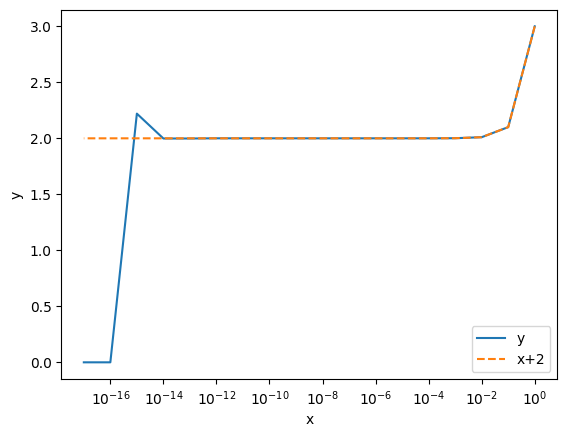

In [6]:
# continued from previouse code cell
# 
import matplotlib.pyplot as plt 
plt.ioff()
plt.semilogx(x,y,label='y')
plt.semilogx(x,z,'--',label='x+2')
plt.legend(loc=4)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Notice that the direct evaluation of $y$  devates from the exact value $x+2$ for x smaller than $10^{-9}$ and catastrophic error takes place below $x=10^{-16}$.  Recall that when $x$ is smaller than the machine epsilon, $x+1=1$!, which cuases this catstrophe.

---

**Example**

Addition of two floating point numbers most likely falls into a gap between two floating point numbers and is rounded off to a new floating point number. Any operation of floating point numbers is subject to the digitization error. Consider $N$ repeated addition of $x$, that is $x+x+\cdots+x$.  The exact answer is obviously $N x$.  However, the repeated addition accumulate error cased by each addition.  To see that we add $1.2$ a million times.

## Accumulation of tiny round-off errors

Since the most of real numbers are between two floating point numbers, each step of calculation suffurs from a tiny round-off error.  Many real applications involves millions of floating point operations and the round-off errors accumulate.  At the end, the error is no longer negligible.  To demonstraite it, we do a kind of stupid calculation.  We just add a millions of $1.2$.  The answer should be $1.2 \times 10^6$. 

In [7]:
import numpy as np

# we add 1.2 million times.
N=1000000
x=1.2
xsum=0.0
for i in range(N):
    xsum=xsum+x

# the above calculation is equivalent to 1.2 \times 10^6
xmul = N*x

print("Summation = ",xsum)
print("Multiplication =", xmul)
print("error =",xsum-xmul)

Summation =  1199999.9999773693
Multiplication = 1200000.0
error = -2.263067290186882e-05


The error is tiny but could be significant depending on the application. In computational physics applications, a million operations is very small calculation. Billions of operations are ubiquitous.  We need to be careful about the accumulation of tiny errors.

## Denormalized floating point (advanced topics)

Many computer systems try to avoid underflow by switching to a different type of floating point method knwown as denormalized float.  Let us check if python uses it.  Try fmin/10.

In [8]:
import sys

fmin = sys.float_info.min
print("fmin/10 =",fmin/10)


fmin/10 = 2.225073858507203e-309


This is smaller than fmin and not 0.  Python apprently used denormalized float.  However, there is limit.  Try fmin $\times 1.0e(-16)$.  Even denormalized float sufferes from underflow error.

In [9]:
print("fmin/10 =",fmin/1e16)

fmin/10 = 0.0



---
Last modified on 02/09/2024 by R. Kawai.